# 🎯 Student Score Predictor (Regression Version)

This notebook trains a regression model to predict a student's average score based on lifestyle/demographic features.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset (make sure to upload in Colab)
df = pd.read_csv("./data/StudentsPerformance.csv")
df = df.drop_duplicates()

for col in ['math score', 'reading score', 'writing score']:
    df = df[df[col].between(0, 100)]

df["avg_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["grade"] = pd.cut(df["avg_score"], bins=[0, 59, 69, 79, 89, 100], labels=["F", "D", "C", "B", "A"])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C


In [5]:
# Manual conversion of categorical fields
df_clean = df.copy()

df_clean["gender"] = df_clean["gender"].map({"female": 0, "male": 1})
df_clean["lunch"] = df_clean["lunch"].map({"free/reduced": 0, "standard": 1})
df_clean["test preparation course"] = df_clean["test preparation course"].map({"none": 0, "completed": 1})
df_clean["race/ethnicity"] = df_clean["race/ethnicity"].map({
    "group A": 0, "group B": 1, "group C": 2, "group D": 3, "group E": 4
})
df_clean["parental level of education"] = df_clean["parental level of education"].map({
    "some high school": 0, "high school": 1, "some college": 2,
    "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5
})
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,grade
0,0,1,4,1,0,72,72,74,72.666667,C
1,0,2,2,1,1,69,90,88,82.333333,B
2,0,1,5,1,0,90,95,93,92.666667,A
3,1,0,3,0,0,47,57,44,49.333333,F
4,1,2,2,1,0,76,78,75,76.333333,C


In [6]:
features = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
X = df_clean[features]
y = df_clean["avg_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

R^2 Score: -0.01959145842171295
RMSE: 218.56632034452207


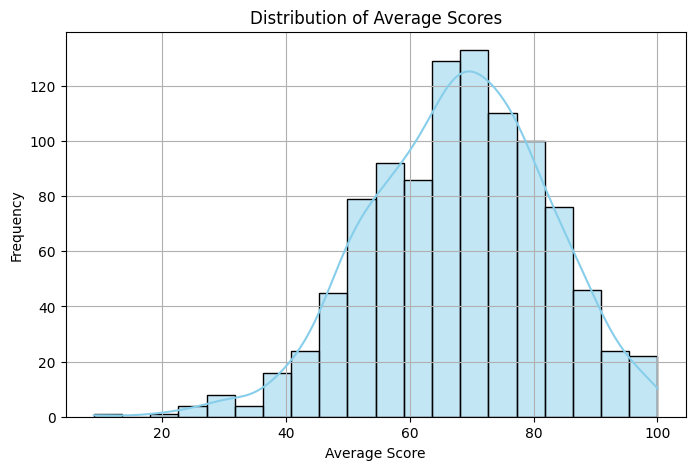

In [7]:
# --- Histogram of Average Scores ---
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["avg_score"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/tmp/ipykernel_7931/954536285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


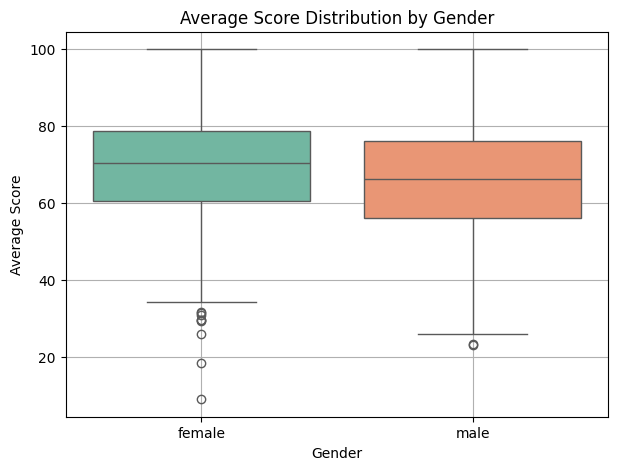

In [8]:
# --- Box Plot: Average Score by Gender ---
plt.figure(figsize=(7, 5))
sns.boxplot(
    x="gender",
    y="avg_score",
    data=df_clean.replace({"gender": {0: "female", 1: "male"}}),
    palette="Set2"
)
plt.title("Average Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()

/tmp/ipykernel_7931/3333601389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


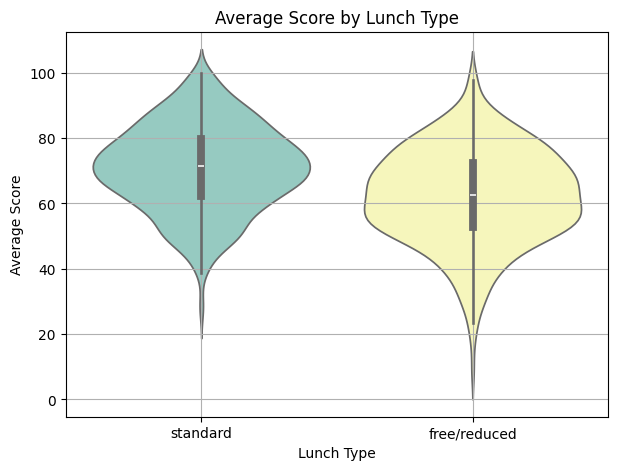

In [9]:
# --- Violin Plot: Average Score by Lunch Type ---
plt.figure(figsize=(7, 5))
sns.violinplot(
    x="lunch",
    y="avg_score",
    data=df_clean.replace({"lunch": {0: "free/reduced", 1: "standard"}}),
    palette="Set3"
)
plt.title("Average Score by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()

/tmp/ipykernel_7931/1517285299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


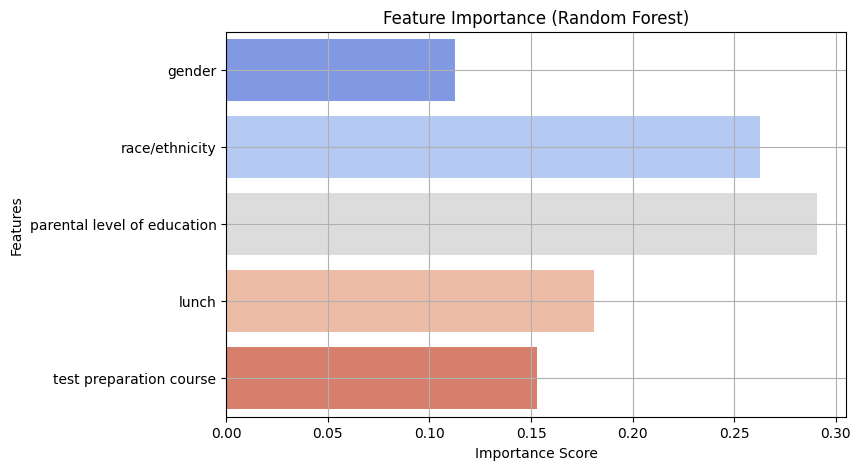

In [10]:
# --- Feature Importance from Random Forest Model ---
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()

In [6]:
import gradio as gr

def score_to_grade(score):
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B"
    elif score >= 70:
        return "C"
    elif score >= 60:
        return "D"
    else:
        return "F"

def predict_avg_score(gender, race, parental_edu, lunch, prep_course):
    gender = 1 if gender == "male" else 0
    lunch = 1 if lunch == "standard" else 0
    prep = 1 if prep_course == "completed" else 0

    race_map = {"group A": 0, "group B": 1, "group C": 2, "group D": 3, "group E": 4}
    edu_map = {
        "some high school": 0, "high school": 1, "some college": 2,
        "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5
    }

    input_data = [[
        gender,
        race_map[race],
        edu_map[parental_edu],
        lunch,
        prep
    ]]

    pred_score = model.predict(input_data)[0]
    return f"Predicted Score: {pred_score:.2f} → Grade: {score_to_grade(pred_score)}"

gr.Interface(
    fn=predict_avg_score,
    inputs=[
        gr.Dropdown(["male", "female"], label="Gender"),
        gr.Dropdown(["group A", "group B", "group C", "group D", "group E"], label="Demographic Group"),
        gr.Dropdown(["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"], label="Parental Education"),
        gr.Dropdown(["standard", "free/reduced"], label="Lunch"),
        gr.Dropdown(["completed", "none"], label="Test Preparation Course"),
    ],
    outputs="text",
    title="📈 Student Score & Grade Predictor"
).launch()


/home/matrix/stuff/projects/machine_learning_projects/tbc_ai_final_project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


/home/matrix/stuff/projects/machine_learning_projects/tbc_ai_final_project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
